# Computer Vision - Input/Output + Basic operations

In this first practical session, you will use the `opencv` library to handle input and output and some operations that can be applied to an image, such as taking a photo of yourself and display it in another colorspace.  
Note that this session will cover the first part of your project as you have to record yourselves.

In [1]:
%matplotlib inline

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageOps, ImageEnhance, Image
from ipywidgets import interact

plt.rcParams['figure.figsize'] = [12, 8]

#### Step 1:  take a photo with your webcam
Create an object to access the webcam and take a photo.  
What is the format use to represent the red, blue and green channels by `opencv`. Do we need to change it to display the image with `matplotlib`?

<function matplotlib.pyplot.show(*args, **kw)>

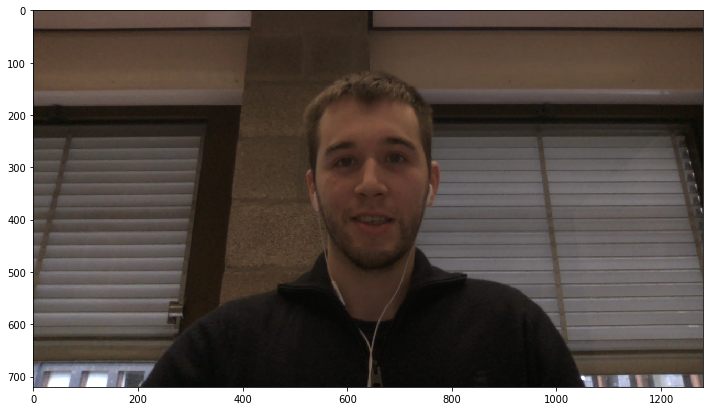

In [6]:
vid = cv2.VideoCapture(0)

ret, frame = vid.read()

vid.release()

# B G R opencv format
# R G B matplotlib format
rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

cv2.imwrite('myframe.png', frame)

plt.imshow(rgb_frame)
plt.show

#### Step 2: change of colorspace
Convert the photo you have taken in another colorspace, for example the HSV one.

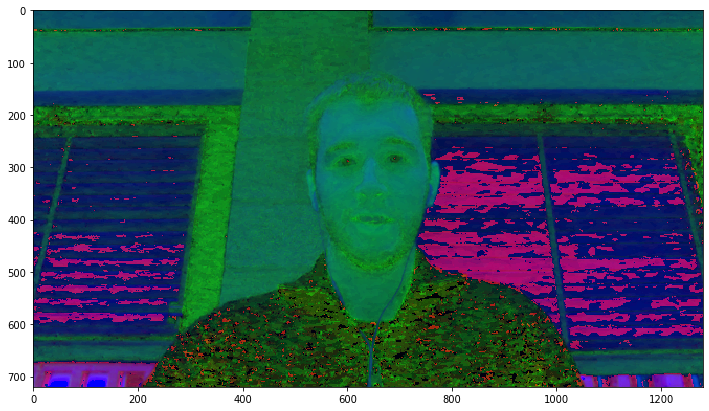

In [7]:
hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

plt.imshow(hsv_frame)
plt.show()

#### Step 3: apply some transformations on the image
We can also change the properties of an image, such as its contrast, brightness, saturation, ...  
The library `PIL` is well suited for those operations. Can you apply those transformations on an `opencv` object (array)? What kind of object do you have to use?

In [8]:
pil_image = Image.fromarray(rgb_frame)

def contrast(v):
    contrast = ImageEnhance.Contrast(pil_image).enhance(v)
    
    contrast = np.array(contrast)
    plt.imshow(contrast)
    plt.show()

In [9]:
interact(contrast, v=(0., 2.))

interactive(children=(FloatSlider(value=1.0, description='v', max=2.0), Output()), _dom_classes=('widget-inter…

<function __main__.contrast(v)>

{'method': 'mirror', 'value': 0}


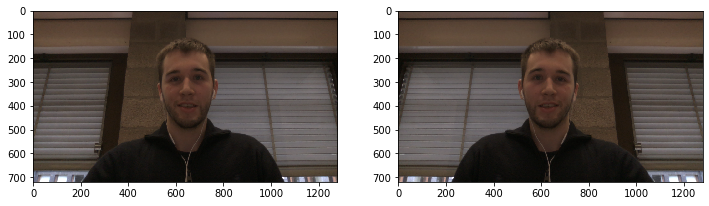

In [14]:
from augmentation import RandAugmentation

augment = RandAugmentation()

img, aug = augment(pil_image)

print(aug)

img = np.array(img)
plt.subplot(1, 2, 1)
plt.imshow(rgb_frame)
plt.subplot(1, 2, 2)
plt.imshow(img)
plt.show()

#### Step 4: record a video of yourself
Now that you can handle your webcam, you can use it to record a video of yourself.  
What are the parameters needed to record a video?

In [15]:
vid = cv2.VideoCapture(0)

FPS = vid.get(cv2.CAP_PROP_FPS)

VIDEO_LENGTH = 10

frame_w = int(vid.get(3))
frame_h = int(vid.get(4))

rec = cv2.VideoWriter('myvideo.mov', cv2.VideoWriter_fourcc('m', 'p', '4', 'c'), FPS, (frame_w, frame_h))

In [17]:
for i in range(int(FPS*VIDEO_LENGTH)):
    
    ret, frame = vid.read()
    rec.write(frame)
    
vid.release()
rec.release()

#### Step 5: segmentation of a color
Segmentation is an useful tool in computer vision. It can be used to extract pixels of the same color.  
Load the image 'squares.png' and try to segment only the red pixels.

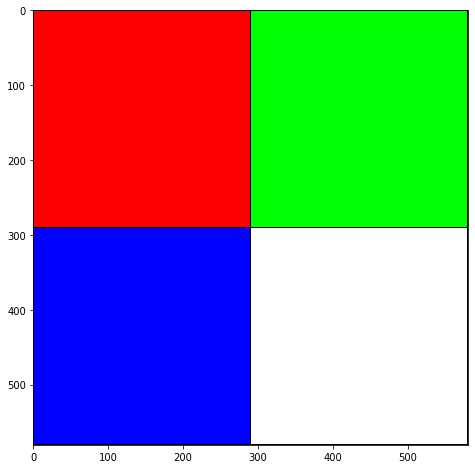

In [18]:
squares = cv2.imread('squares.png')

rgb_squares = cv2.cvtColor(squares, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_squares)
plt.show()

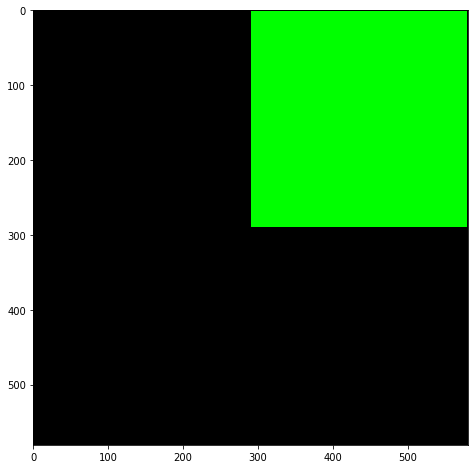

In [21]:
black = np.array([0, 0, 0])
blue = np.array([255, 0, 0])
green = np.array([0, 255, 0])
red = np.array([0, 0, 255])
white = np.array([255, 255, 255])

mask = cv2.inRange(squares, black, green)

res = cv2.bitwise_and(squares, squares, mask=mask)

rgb = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.show()

#### Step 6: detection of an object in a video
Now that we have a tool to segment pixels of a given color, we can apply the same method to track an object in a video.  
Load the video 'book.mov' and try to track the yellow book.

In [ ]:
vid = cv2.VideoCapture('book.mov')

FPS = vid.get(cv2.CAP_PROP_FPS)

VIDEO_LENGTH = 10

frame_w = int(vid.get(3))
frame_h = int(vid.get(4))

rec = cv2.VideoWriter('myvideo2.mov', cv2.VideoWriter_fourcc('m', 'p', '4', 'c'), FPS, (frame_w, frame_h))

while(vid.isOpened()):
    
    ret, frame = vid.read()
    
    if ret == False:
        break
        
    lower_yellow = np.array([0, 80, 80])
    upper_yellow = np.array([50, 255, 255])
    
    mask = cv2.inRange(frame, lower_yellow, upper_yellow)
    
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    rec.write(res)
    
vid.release()
rec.release()